In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aks245/Dataset/main/WC_AT.csv")
df.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [18]:
df.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


<AxesSubplot:xlabel='Waist', ylabel='Density'>

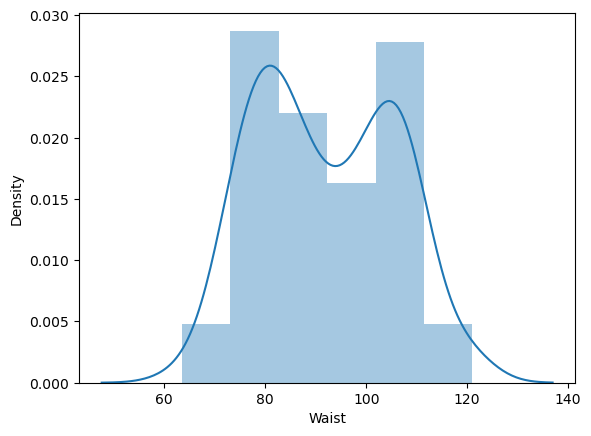

In [4]:
sns.distplot(df['Waist'])

<AxesSubplot:xlabel='AT', ylabel='Density'>

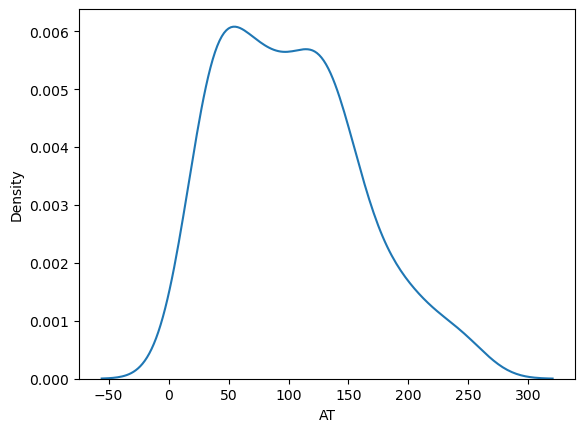

In [5]:
sns.kdeplot(df['AT'])

<AxesSubplot:xlabel='Waist', ylabel='AT'>

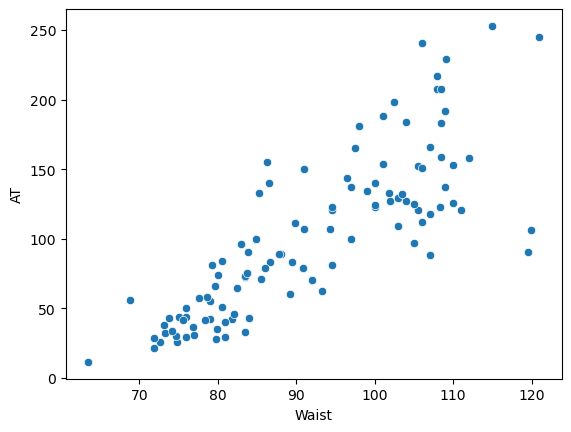

In [6]:
sns.scatterplot(df['Waist'],df['AT'])

In [7]:
df.corr()
#corelation

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<AxesSubplot:>

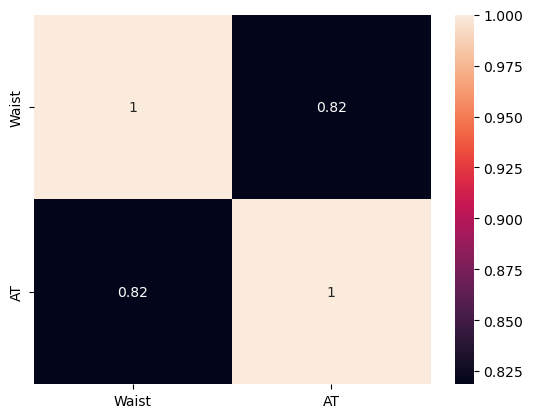

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
import statsmodels.formula.api as smf

In [10]:
model =  smf.ols('AT~Waist', data= df).fit()

In [11]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [12]:
#line Eq
x = 500
y = 1.33*x+13.83
y

678.83

In [13]:
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}")

t value is
Intercept    -9.909103
Waist        14.740376
dtype: float64
P value is
Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [14]:
model.rsquared

0.670036893052843

In [15]:
newdf = pd.Series([40,55,120,66,76,89])
newdf = pd.DataFrame(newdf, columns=['Waist'])
newdf

,Waist
0,40
1,55
2,120
3,66
4,76
5,89


In [16]:
model.predict(newdf)

0    -77.627112
1    -25.744221
2    199.081639
3     12.303232
4     46.891826
5     91.856998
dtype: float64

In [17]:
#in actual data min value is 63 therefore below 63 it is showing negative value for At